<a href="https://colab.research.google.com/github/cateto/python4NLP/blob/main/NER/20211015_Tagging_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
import nltk
nltk.download('treebank')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

In [3]:
#토큰화에 품사 태깅이 된 데이터 받아오기 (NLTK)
tagged_sentences = nltk.corpus.treebank.tagged_sents()
print("품사 태깅이 된 문장개수:", len(tagged_sentences)) #문장 샘플의 개수 출력

품사 태깅이 된 문장개수: 3914


In [4]:
tagged_sentences[0]

[('Pierre', 'NNP'),
 ('Vinken', 'NNP'),
 (',', ','),
 ('61', 'CD'),
 ('years', 'NNS'),
 ('old', 'JJ'),
 (',', ','),
 ('will', 'MD'),
 ('join', 'VB'),
 ('the', 'DT'),
 ('board', 'NN'),
 ('as', 'IN'),
 ('a', 'DT'),
 ('nonexecutive', 'JJ'),
 ('director', 'NN'),
 ('Nov.', 'NNP'),
 ('29', 'CD'),
 ('.', '.')]

In [5]:
# target 단어 끼리, result pos 끼리 묶어주기 위해서 동일한 개수를 가지는 시퀀스 자료형에서 순서에 맞는 원소들끼리 묶어주는 zip() 함수를 이용
sentences, pos_tags = [],[]
for tagged_sentence in tagged_sentences:
  # 각 샘플에서 단어들은 sentence에 품사 태깅 정보는 tag_info에 저장한다.
  sentence, tag_info = zip(*tagged_sentence) 
  sentences.append(list(sentence))
  pos_tags.append(list(tag_info))

In [6]:
print(sentences[0])
print(pos_tags[0])

['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.']
['NNP', 'NNP', ',', 'CD', 'NNS', 'JJ', ',', 'MD', 'VB', 'DT', 'NN', 'IN', 'DT', 'JJ', 'NN', 'NNP', 'CD', '.']


In [7]:
print(sentences[8])
print(pos_tags[8])

['We', "'re", 'talking', 'about', 'years', 'ago', 'before', 'anyone', 'heard', 'of', 'asbestos', 'having', 'any', 'questionable', 'properties', '.']
['PRP', 'VBP', 'VBG', 'IN', 'NNS', 'IN', 'IN', 'NN', 'VBD', 'IN', 'NN', 'VBG', 'DT', 'JJ', 'NNS', '.']


샘플의 최대 길이 : 271
샘플의 평균 길이 : 25


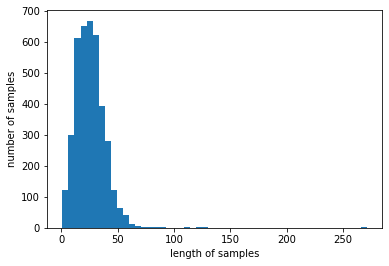

In [8]:
print("샘플의 최대 길이 : %d" % max(len(l) for l in sentences))
print("샘플의 평균 길이 : %d" % (sum(map(len, sentences))/len(sentences)))
plt.hist([len(s) for s in sentences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [9]:
def tokenize(samples):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(samples)
  return tokenizer

In [10]:
#문장 정보 토크나이저
src_tokenizer = tokenize(sentences)
#품사 태깅 정보 토큰나이저
tar_tokenizer = tokenize(pos_tags)

In [11]:
vocab_size = len(src_tokenizer.word_index)+1
tag_size = len(tar_tokenizer.word_index)+1
print('단어 집합의 크기 : {}'.format(vocab_size))
print('태깅 정보 집합의 크기: {}'.format(tag_size))

단어 집합의 크기 : 11388
태깅 정보 집합의 크기: 47


In [12]:
X_train = src_tokenizer.texts_to_sequences(sentences)
Y_train = tar_tokenizer.texts_to_sequences(pos_tags)

In [13]:
print(X_train[:2])

[[5601, 3746, 1, 2024, 86, 331, 1, 46, 2405, 2, 131, 27, 6, 2025, 332, 459, 2026, 3], [31, 3746, 20, 177, 4, 5602, 2915, 1, 2, 2916, 637, 147, 3]]


In [14]:
print(Y_train[:2])

[[3, 3, 8, 10, 6, 7, 8, 21, 13, 4, 1, 2, 4, 7, 1, 3, 10, 9], [3, 3, 17, 1, 2, 3, 3, 8, 4, 3, 19, 1, 9]]


In [15]:
#패딩
max_len = 150
X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
Y_train = pad_sequences(Y_train, padding='post', maxlen=max_len)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=.2, random_state=777) # 8:2의 비율로 분리

In [17]:
y_train = to_categorical(y_train, num_classes=tag_size)
y_test = to_categorical(y_test, num_classes=tag_size)

In [18]:
print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 문장의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (3131, 150)
훈련 샘플 레이블의 크기 : (3131, 150, 47)
테스트 샘플 문장의 크기 : (783, 150)
테스트 샘플 문장의 크기 : (783, 150, 47)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding
from tensorflow.keras.optimizers import Adam

In [20]:
embedding_dim = 128
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, mask_zero=True))
model.add(Bidirectional(LSTM(hidden_units, return_sequences=True)))
model.add(TimeDistributed(Dense(tag_size, activation=("softmax"))))
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.002),metrics=['accuracy'])

In [21]:
model.fit(X_train, y_train, batch_size=128, epochs=6, validation_data=(X_test, y_test))

Epoch 1/6
25/25 [==============================] - 19s 214ms/step - loss: 0.5585 - accuracy: 0.1412 - val_loss: 0.4901 - val_accuracy: 0.2153
Epoch 2/6
25/25 [==============================] - 2s 89ms/step - loss: 0.4392 - accuracy: 0.3845 - val_loss: 0.3367 - val_accuracy: 0.5159
Epoch 3/6
25/25 [==============================] - 2s 89ms/step - loss: 0.2373 - accuracy: 0.6579 - val_loss: 0.1467 - val_accuracy: 0.8106
Epoch 4/6
25/25 [==============================] - 2s 88ms/step - loss: 0.0908 - accuracy: 0.8889 - val_loss: 0.0693 - val_accuracy: 0.9026
Epoch 5/6
25/25 [==============================] - 2s 91ms/step - loss: 0.0379 - accuracy: 0.9521 - val_loss: 0.0490 - val_accuracy: 0.9242
Epoch 6/6
25/25 [==============================] - 2s 88ms/step - loss: 0.0218 - accuracy: 0.9702 - val_loss: 0.0428 - val_accuracy: 0.9310


In [22]:
print('테스트 정확도 : %4f'% (model.evaluate(X_test, y_test)[1]))

25/25 [==============================] - 0s 18ms/step - loss: 0.0428 - accuracy: 0.9310
테스트 정확도 : 0.931045


In [23]:
index_to_word = src_tokenizer.index_word
index_to_tag = tar_tokenizer.index_word

In [24]:
i=10 #확인하고 싶은 테스트 용 샘플의 인덱스
y_predicted = model.predict(np.array([X_test[i]]))
y_predicted = np.argmax(y_predicted, axis=-1) #원핫인코딩을 다시 정수 인코딩으로 변경
true = np.argmax(y_test[i], -1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함. 

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for w, t, pred in zip(X_test[i], true, y_predicted[0]):
  if w !=0:
    print("{:17}: {:7} {}".format(index_to_word[w], index_to_tag[t].upper(), index_to_tag[pred].upper()))

단어             |실제값  |예측값
-----------------------------------
in               : IN      IN
addition         : NN      NN
,                : ,       ,
buick            : NNP     NNP
is               : VBZ     VBZ
a                : DT      DT
relatively       : RB      RB
respected        : VBN     VBN
nameplate        : NN      NN
among            : IN      IN
american         : NNP     NNP
express          : NNP     NNP
card             : NN      NN
holders          : NNS     NNS
,                : ,       ,
says             : VBZ     VBZ
0                : -NONE-  -NONE-
*t*-1            : -NONE-  -NONE-
an               : DT      DT
american         : NNP     NNP
express          : NNP     NNP
spokeswoman      : NN      NN
.                : .       .
